In [1]:
import pandas as pd
import numpy as np

# Create a dummy dataframe
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Age': [25, 35, 22, 28, 'unknown'],
        'Gender': ['F', 'M', 'M', 'M', 'F'],
        'Income': ['$50,000', '$75,000', '60,000', '$90,000', ''],
        'Education Level': ['Bachelor\'s Degree', 'Master\'s Degree', 'High School', 'Doctorate', 'Associate\'s Degree']}
df = pd.DataFrame(data)

# Check the dataframe
print(df.head())
print(df.info())
print(df.isnull().sum())

      Name      Age Gender   Income     Education Level
0    Alice       25      F  $50,000   Bachelor's Degree
1      Bob       35      M  $75,000     Master's Degree
2  Charlie       22      M   60,000         High School
3    David       28      M  $90,000           Doctorate
4      Eve  unknown      F           Associate's Degree
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             5 non-null      object
 1   Age              5 non-null      object
 2   Gender           5 non-null      object
 3   Income           5 non-null      object
 4   Education Level  5 non-null      object
dtypes: object(5)
memory usage: 328.0+ bytes
None
Name               0
Age                0
Gender             0
Income             0
Education Level    0
dtype: int64


In [2]:
# Step 1: Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [3]:
# Step 2: Cleaning the data
# Replace 'unknown' values in Age column with NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Remove '$' and ',' from Income column and convert it to float
df['income'] = df['income'].str.replace('$', '').str.replace(',', '').apply(lambda x: float(x) if x != '' else np.nan)

# Drop any duplicates
df = df.drop_duplicates()

C:\Users\user\AppData\Local\Temp\ipykernel_21288\772429867.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('$', '').str.replace(',', '').apply(lambda x: float(x) if x != '' else np.nan)


In [4]:
# Check for NaN values in each column  
print(df.isna().sum())

name               0
age                1
gender             0
income             1
education_level    0
dtype: int64


In [6]:
# replace with mean or median as appropriate
df['age'] = df['age'].fillna(df['age'].mean())
df['income'] = df['income'].fillna(df['income'].median())


In [7]:
# Step 3: Statistical checks
print(df.describe())

             age        income
count   5.000000      5.000000
mean   27.500000  68500.000000
std     4.821825  15165.750888
min    22.000000  50000.000000
25%    25.000000  60000.000000
50%    27.500000  67500.000000
75%    28.000000  75000.000000
max    35.000000  90000.000000


In [8]:
# Matrix of correlation coefficients 
print(df.corr()) 

             age    income
age     1.000000  0.521356
income  0.521356  1.000000


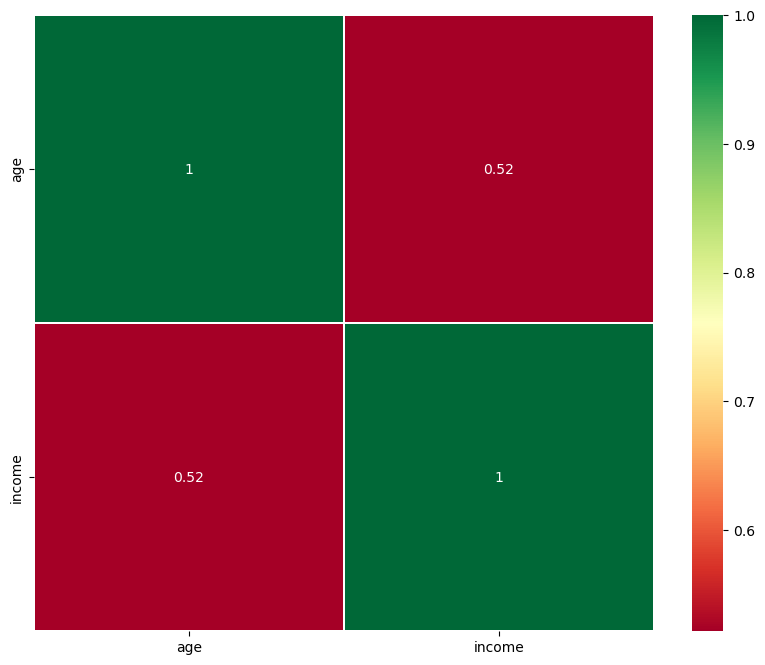

In [9]:
# Heatmap of correlation coefficients 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) 
fig=plt.gcf() 
fig.set_size_inches(10,8) 
plt.show() 

In [ ]:



# Step 4: Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the dataframe into features and target
X = df[['age', 'gender', 'income', 'education_level']]
y = df['name']

# Drop features that are not needed
X = X.drop(['gender', 'education_level'], axis=1)

# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model and make predictions
lin_reg.fit(X, y)
predictions = lin_reg.predict(X)